In [ ]:
import cirq
import numpy as np
import sympy
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt

from qiskit.visualization import *

import server
server = server.Server()

In [ ]:
def probability(res, n):
    keys_as_int = sorted(map(int, res.keys()))
    ans = {}

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, f'0{n}b') for key in keys_as_int]

    for i in range(n):
        for j in range(len(binary_labels)):
            if binary_labels[j][i] == '0':
                if i in ans:
                    ans[i] += res[str(keys_as_int[j])]

                else:
                    ans[i] = res[str(keys_as_int[j])]

    return ans

In [ ]:
def plot(res):
    Convert keys to integers and sort them
    keys_as_int = sorted(map(int, res.keys()))

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, '03b') for key in keys_as_int]
    print(binary_labels)

    # Extract corresponding values
    values = [res[str(key)] for key in keys_as_int]

    # Plotting
    plt.bar(binary_labels, values)
    plt.xlabel('Binary Number (Big Endian)')
    plt.ylabel('Value')
    plt.title('Histogram of Result Object')
    plt.show()

In [ ]:
qc = QuantumCircuit(12)

qc.x(3)
qc.x(6)
qc.x(8)

qc.x(0)
qc.x(3)
qc.x(4)
qc.x(8)
qc.x(9)
qc.x(10)

qc.cx(3,8)
qc.cx(3,9)

qc.draw("mpl")

In [5]:
test_probe = qc.qasm()
print(test_probe)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[12];
x q[3];
x q[6];
x q[8];
x q[0];
x q[3];
x q[4];
x q[8];
x q[9];
x q[10];
cx q[3],q[8];
cx q[3],q[9];



In [6]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
res = server.probe(vault_index=3, circuit=test_probe)
print(res)

{'321': 0.005, '631': 0.005, '834': 0.01, '835': 0.005, '837': 0.01, '929': 0.005, '991': 0.005, '1314': 0.005, '1341': 0.005, '1344': 0.005, '1346': 0.005, '1349': 0.005, '1350': 0.005, '1373': 0.005, '1413': 0.005, '1435': 0.005, '1442': 0.005, '1473': 0.005, '1474': 0.005, '1497': 0.005, '1640': 0.005, '1741': 0.005, '1826': 0.005, '1861': 0.005, '1887': 0.005, '1986': 0.005, '2059': 0.005, '2133': 0.005, '2253': 0.005, '2323': 0.005, '2373': 0.005, '2375': 0.005, '2378': 0.005, '2391': 0.005, '2465': 0.005, '2633': 0.005, '2635': 0.005, '2650': 0.005, '2681': 0.005, '2782': 0.005, '2817': 0.005, '2818': 0.005, '2880': 0.01, '2881': 0.005, '2885': 0.005, '2887': 0.005, '2889': 0.005, '2901': 0.005, '2903': 0.005, '2909': 0.005, '2911': 0.005, '2913': 0.005, '2976': 0.005, '3008': 0.005, '3009': 0.005, '3012': 0.005, '3013': 0.01, '3015': 0.005, '3033': 0.005, '3035': 0.005, '3037': 0.005, '3039': 0.005, '3147': 0.005, '3155': 0.01, '3158': 0.005, '3163': 0.005, '3166': 0.005, '3275'

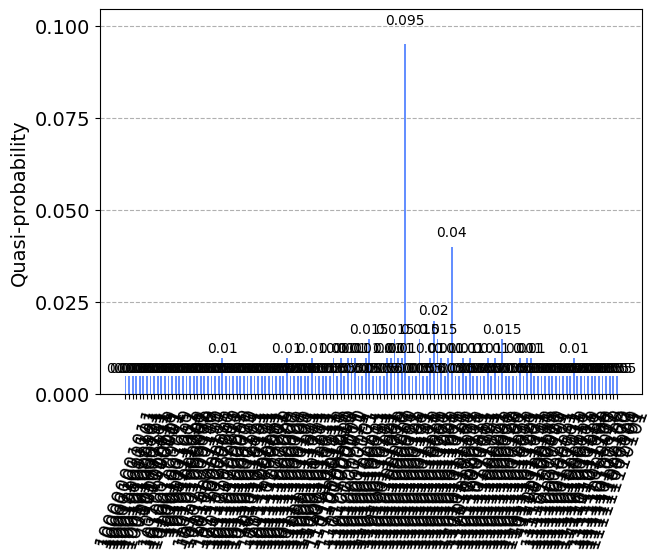

In [7]:
    binary_dict = {bin(int(key))[2:]: value for key, value in res.items()}
    plot_distribution(binary_dict)

In [8]:
res2 = {}
for key, val in binary_dict.items():
    if val > 0.005:
        res2[key] = val

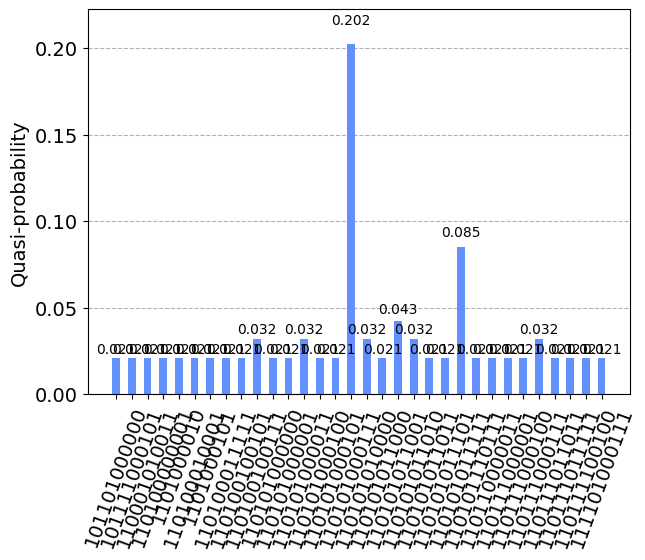

In [9]:
plot_distribution(res2, sort="asc")

In [ ]:
plot(res2)

In [57]:
probability(res2, 12)

{1: 0.37500000000000006,
 2: 0.35000000000000003,
 3: 0.055,
 4: 0.37500000000000006,
 5: 0.01,
 6: 0.37000000000000005,
 7: 0.055,
 8: 0.35500000000000004,
 9: 0.37500000000000006,
 10: 0.08499999999999999,
 11: 0.38000000000000006}

In [ ]:
server.attack(vault_index=3, circuit=test_probe)